In [1]:
# Linear Regression Tutorial
# California Housing Price Prediction

# Import necessary libraries
# NEW CELL ————
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseValue')

# Display the feature names and their descriptions
print("Dataset Features:")
for i, feature in enumerate(california.feature_names):
    print(f"{feature}: {california.feature_names[i]}")
print("\nTarget Variable: MedHouseValue (median house value in $100,000s)")

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
df = pd.concat([X, y], axis=1)
print(df.head())

Dataset Features:
MedInc: MedInc
HouseAge: HouseAge
AveRooms: AveRooms
AveBedrms: AveBedrms
Population: Population
AveOccup: AveOccup
Latitude: Latitude
Longitude: Longitude

Target Variable: MedHouseValue (median house value in $100,000s)

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


## California Housing Dataset: Column Explanations and Business Meanings
MedInc: Median income in the block group

Business meaning: Represents the socioeconomic status of neighborhoods
Unit: Measured in tens of thousands of US Dollars ($10,000)
Impact: Higher median income typically correlates with higher house values
HouseAge: Median house age in the block group

Business meaning: Indicates property age and potential for depreciation/appreciation
Unit: Years
Impact: Both very new and historical homes may command premium prices
AveRooms: Average number of rooms per household

Business meaning: Measure of house size and potential living space
Unit: Rooms per household
Impact: More rooms generally increases property value, but depends on region
AveBedrms: Average number of bedrooms per household

Business meaning: Indicates family accommodation capacity
Unit: Bedrooms per household
Impact: More bedrooms typically increases value but with diminishing returns
Population: Block group population

Business meaning: Population density indicator
Unit: Total number of people
Impact: Can indicate urban vs suburban settings; affects property demand
AveOccup: Average occupancy per household

Business meaning: Household density or average family size in the area
Unit: Persons per household
Impact: Areas with larger families may have different housing markets
Latitude: Block group latitude coordinate

Business meaning: Geographic location (north-south position)
Unit: Degrees north
Impact: Captures regional differences in California housing markets
Longitude: Block group longitude coordinate

Business meaning: Geographic location (east-west position)
Unit: Degrees west
Impact: Coastal properties often command premium prices
MedHouseValue: Median house value for block groups

Business meaning: The target variable we're trying to predict
Unit: Measured in hundreds of thousands of US Dollars ($100,000)
Note: This is what our model will predict based on the features above

In [3]:
# Basic dataset information
print("Dataset shape:", df.shape)
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (20640, 9)

Basic statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532 

In [4]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


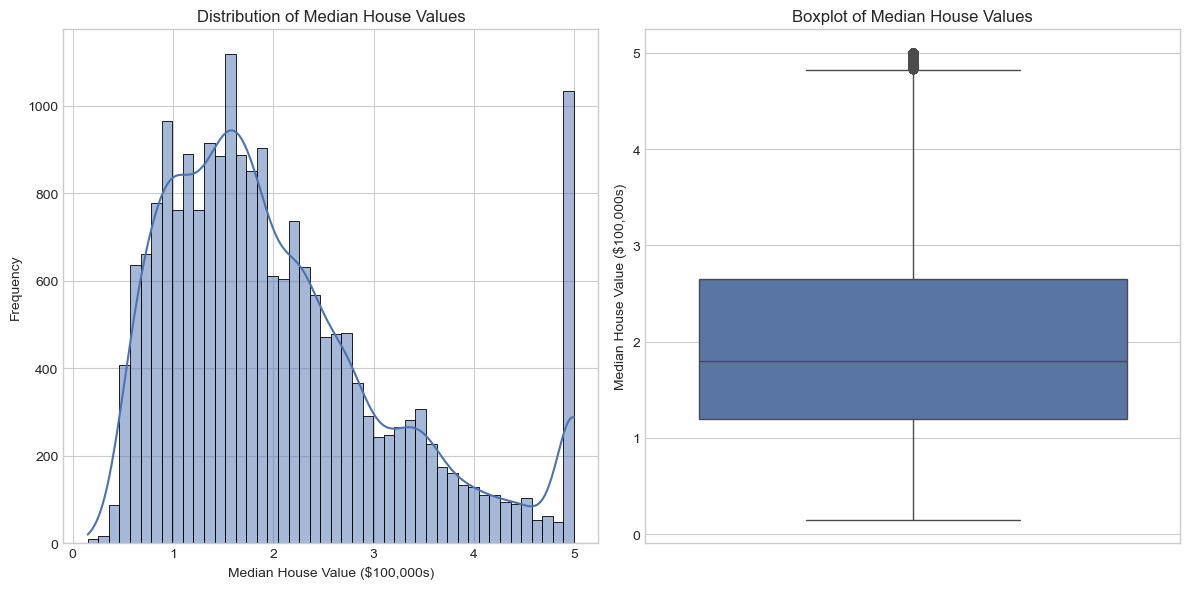

In [5]:
# Data Exploration: Distribution of target variable (House Prices)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['MedHouseValue'], kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['MedHouseValue'])
plt.title('Boxplot of Median House Values')
plt.ylabel('Median House Value ($100,000s)')

plt.tight_layout()
plt.show()

# INSTRUCTION:
# Look at the distribution of house prices.
# Is it normally distributed or skewed?
# Check for outliers in the boxplot. Extreme outliers might need to be removed
# as they can disproportionately influence the regression model.

In [6]:
# Identify and handle outliers (optional step based on boxplot observation)
Q1 = df['MedHouseValue'].quantile(0.25)
Q3 = df['MedHouseValue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['MedHouseValue'] < lower_bound) | (df['MedHouseValue'] > upper_bound)]
print(f"Number of outliers identified: {len(outliers)}")

# Remove outliers if necessary
# Uncomment the line below to remove outliers
# df = df[(df['MedHouseValue'] >= lower_bound) & (df['MedHouseValue'] <= upper_bound)]
# print(f"Shape after removing outliers: {df.shape}")




# INSTRUCTION:
# Outlier handling is a critical step in preparing data for linear regression:
# 1. First, identify outliers using statistical methods like the IQR method shown above
# 2. Before removing outliers, investigate WHY they exist:
#    - Are they data entry errors? If so, they should be removed or corrected
#    - Are they legitimate but extreme values? If so, consider:
#      a) Removing them if they unduly influence the model and aren't representative
#      b) Keeping them if they represent important but rare cases in your domain
#      c) Transforming the variable (e.g., log transformation) to reduce their impact
# 3. Visualize your data before and after outlier removal to understand the impact
# 4. Consider how outlier removal affects your sample size and representation
# 5. In a business context, extreme housing prices might represent luxury properties
#    or special cases that could be important for certain market segments
# 6. Document and justify your decision about outlier treatment as it will
#    affect all downstream analysis and model performance
#
# Attention: threating outliers is very important as linear regression is very
#            sensitive to them.
#            After threating the outliers, check how every plot and relationships
#            between the variables change.

Number of outliers identified: 1071


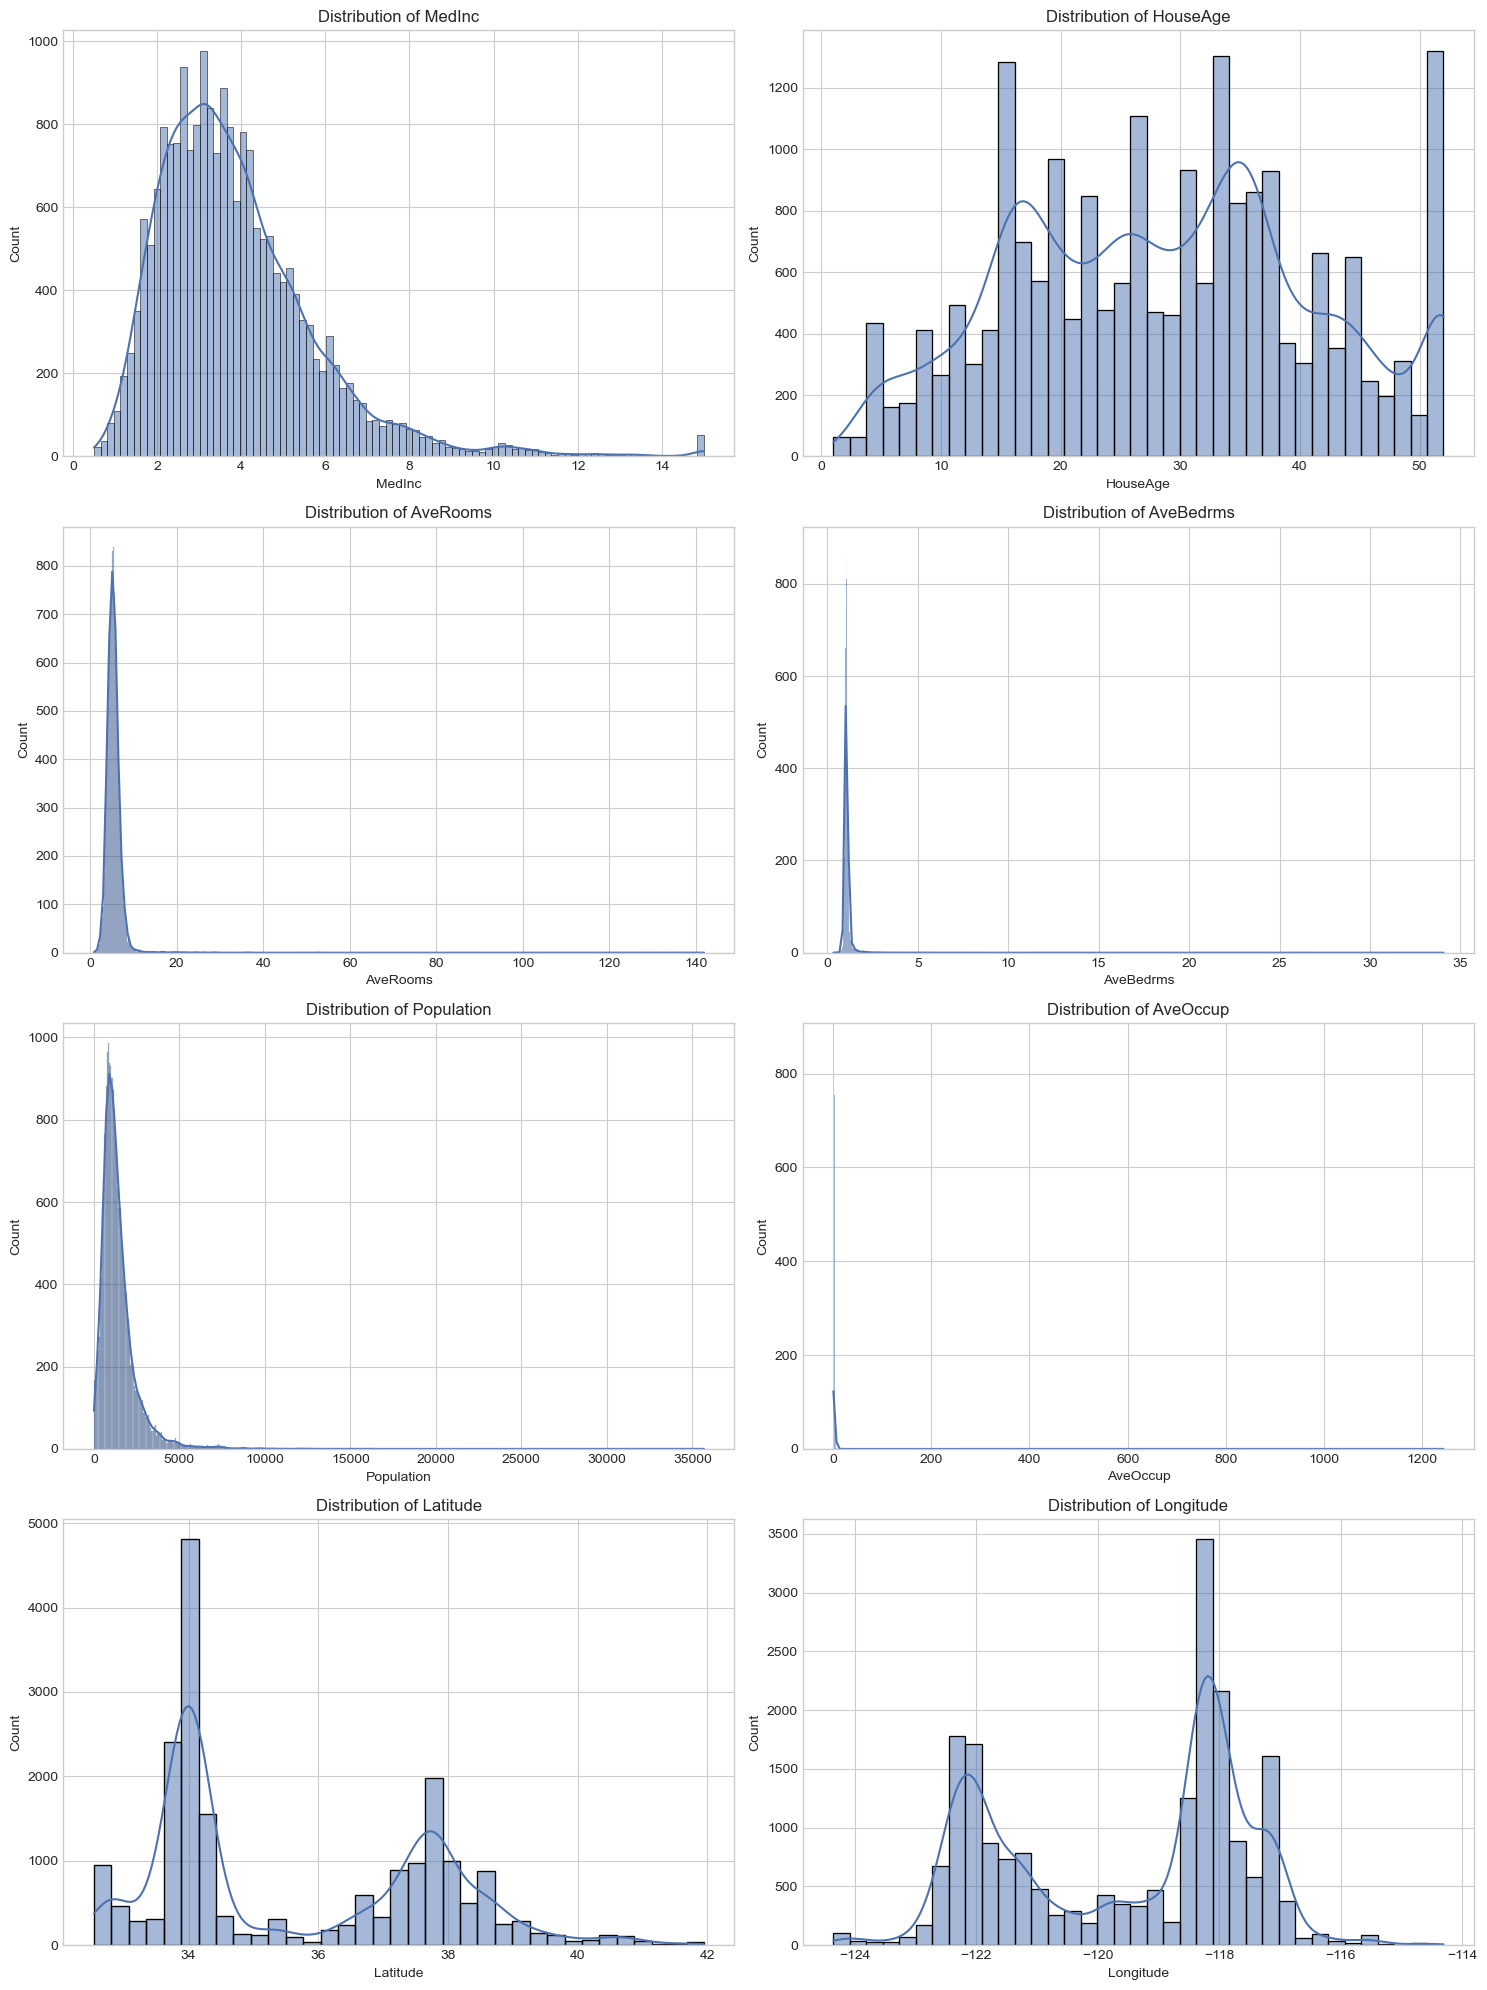

In [7]:
# Explore feature distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

# INSTRUCTION:
# Examine the distribution of each feature.
# Look for features with skewed distributions, which might benefit from transformation.
# Features with normal distributions typically work better with linear regression.
# Check how threating the outliers change the distribution plots.

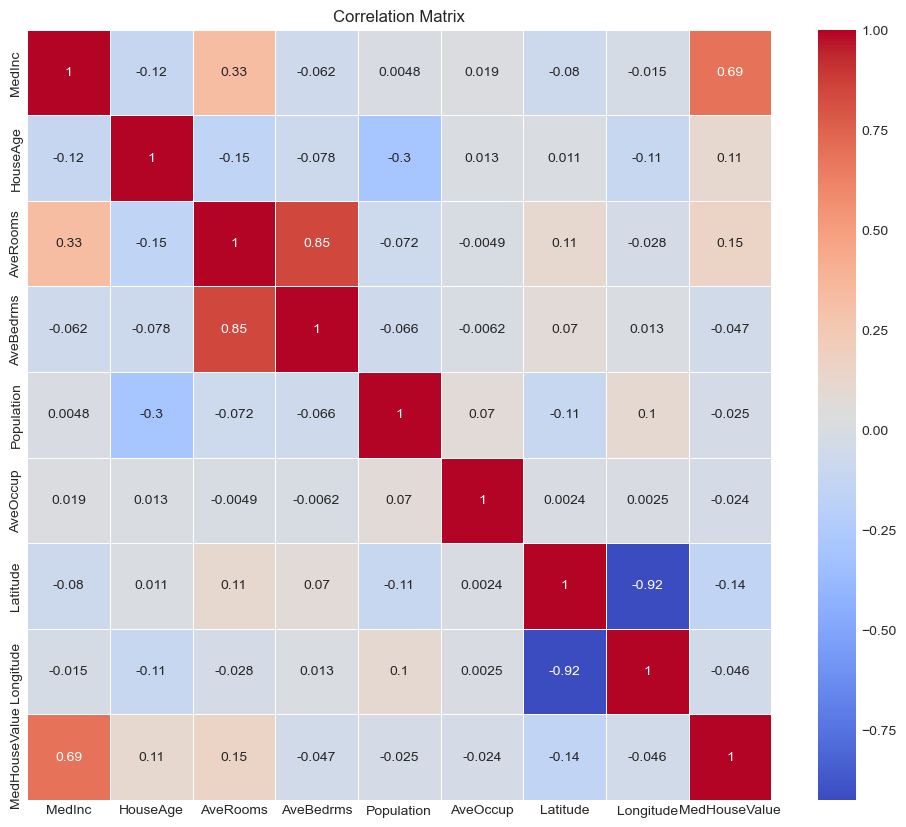

In [8]:
# Correlation matrix to understand relationships between variables
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# INSTRUCTION:
# Look for features that have strong correlations (positive or negative) with MedHouseValue.
# Features with correlation values close to +1 or -1 with the target are good candidates for simple linear regression.
# Also, look for multicollinearity (features that are strongly correlated with each other).
# If two features are highly correlated with each other (e.g., > 0.7), consider dropping one of them
# as they provide similar information and can make the model less stable.
# Check how this plot can change after threating outliers and doing feature engineering.

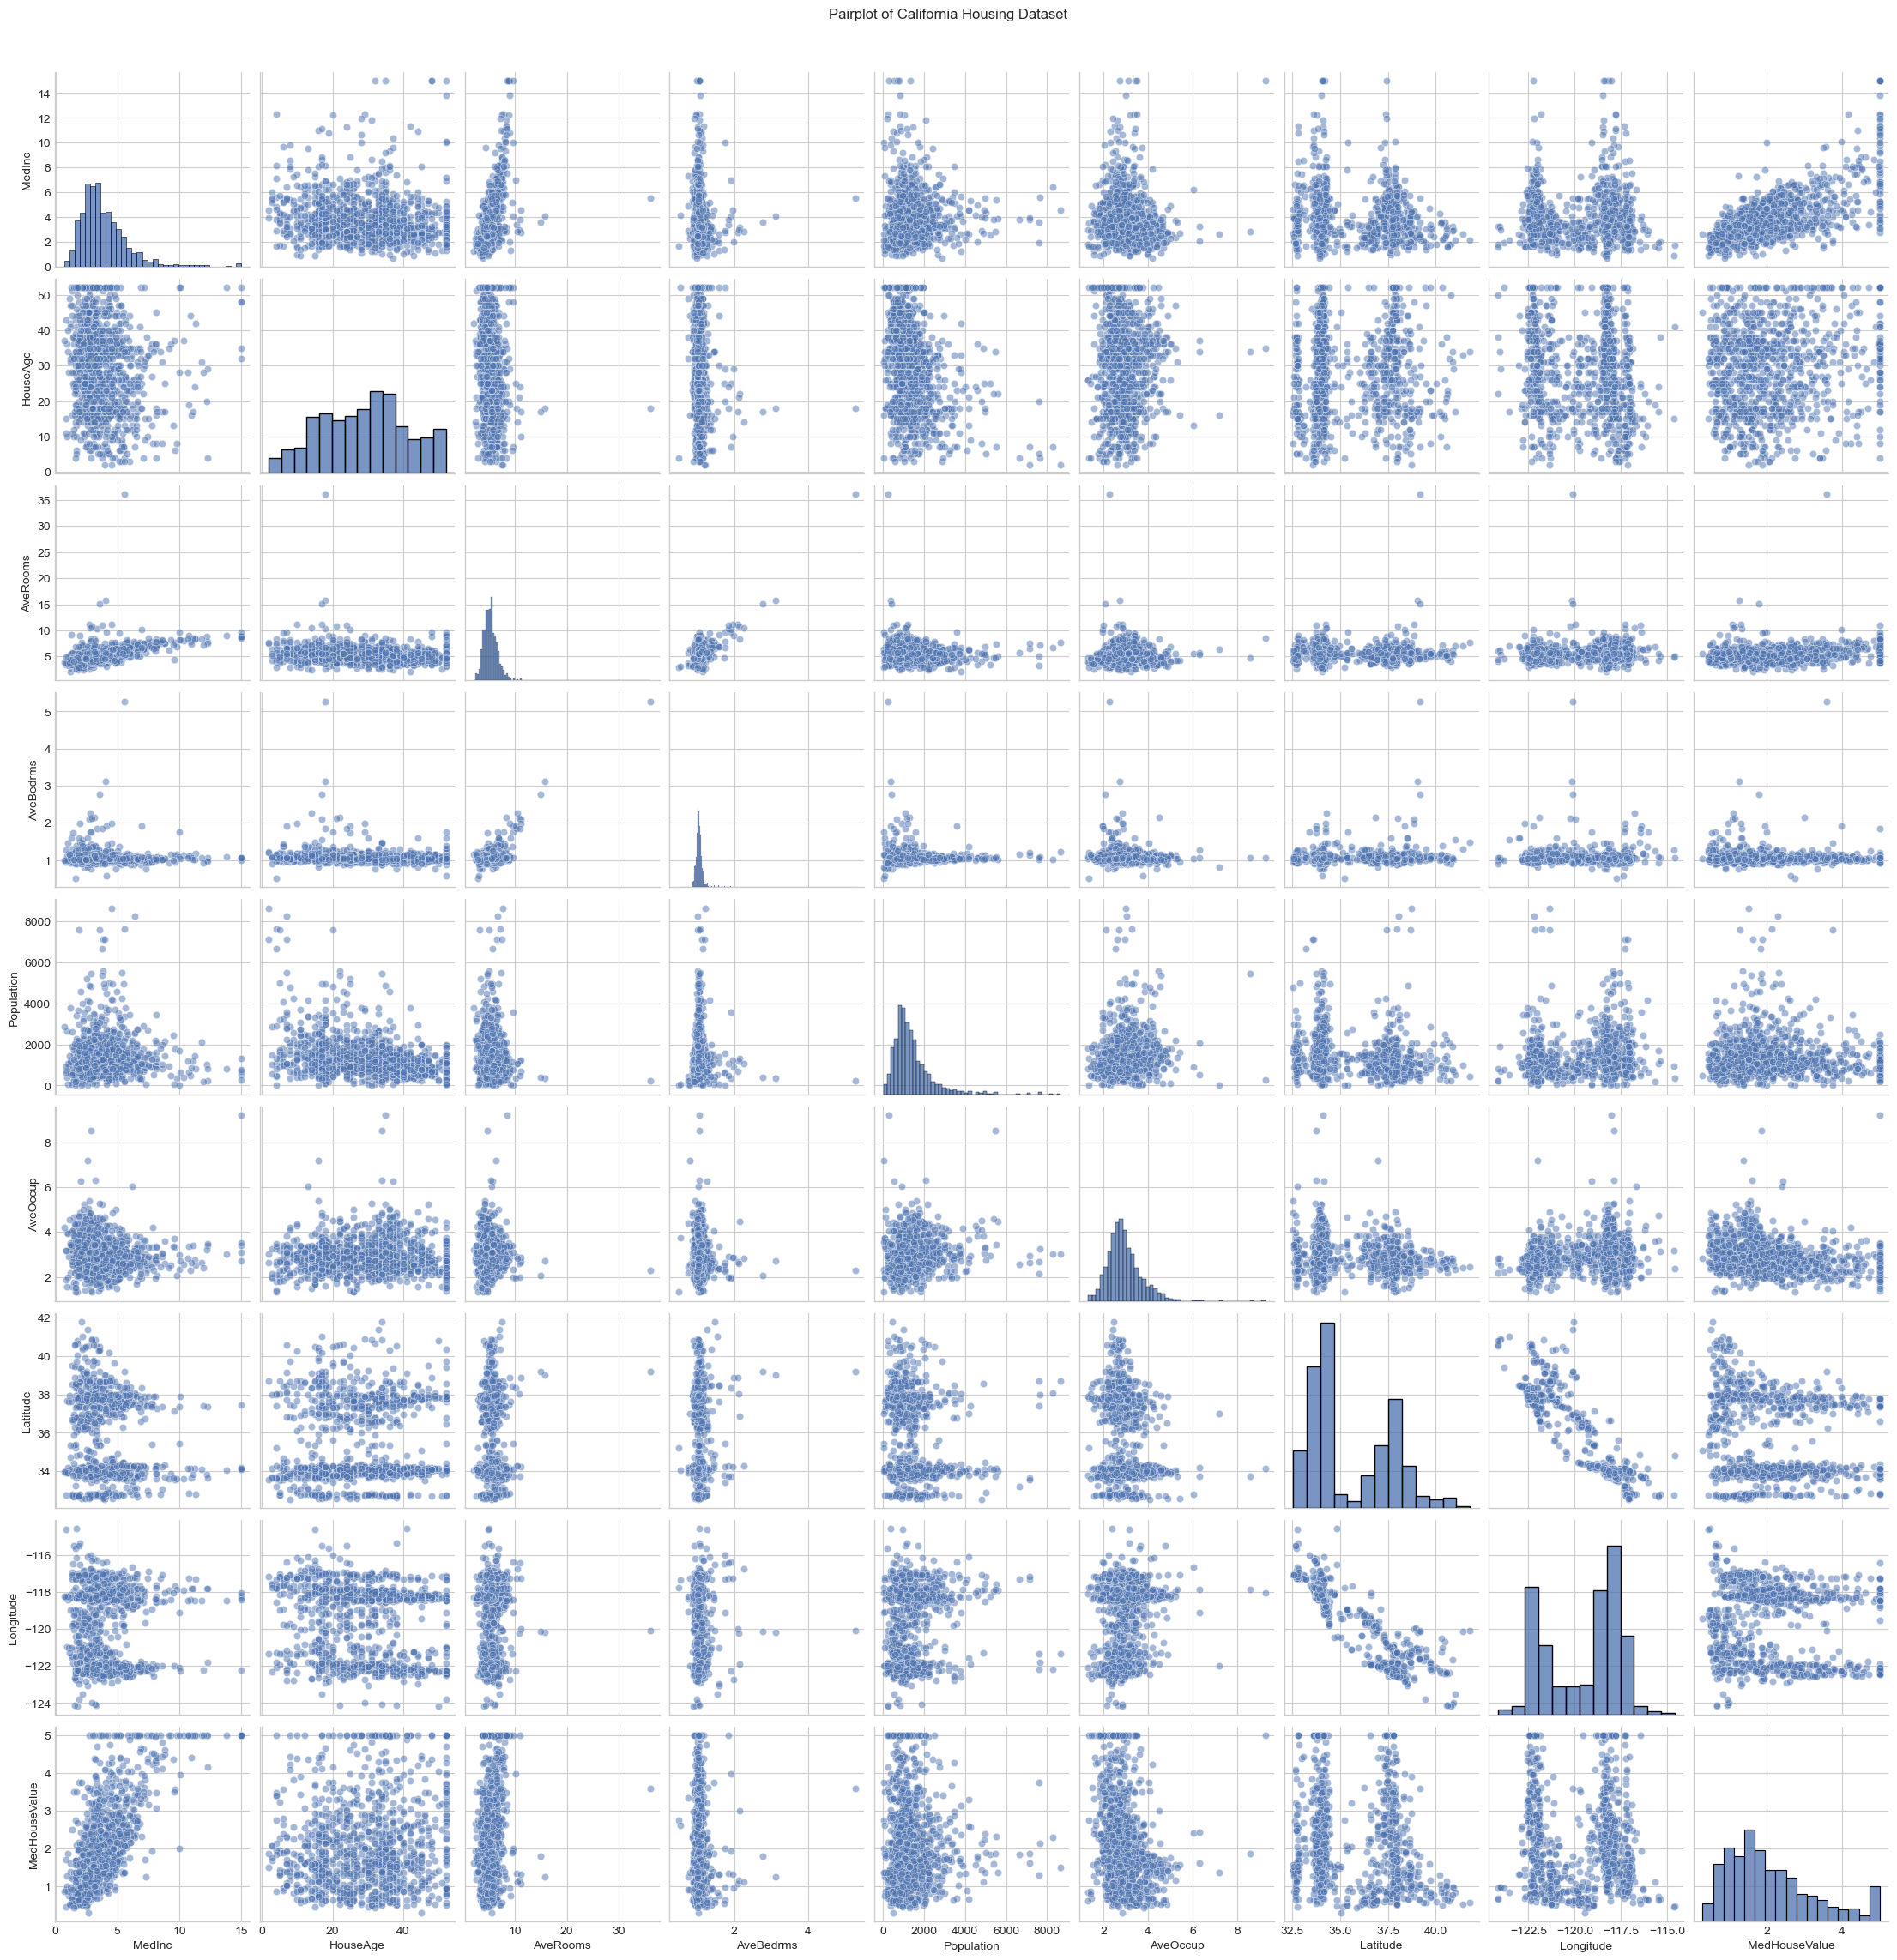

In [9]:
# Pairplot to visualize relationships between variables
# This might take a while to run due to the number of observations
# Consider using a sample if the dataset is very large
sample_size = min(1000, len(df))  # Take a sample for faster plotting
df_sample = df.sample(sample_size, random_state=42)

sns.pairplot(df_sample, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of California Housing Dataset', y=1.02)
plt.show()

# INSTRUCTION:
# The pairplot shows scatter plots for each pair of variables and histograms on the diagonal.
# Look for:
# 1. Linear relationships between features and the target (MedHouseValue) - these would appear as patterns
#    in the scatter plots that can be approximated by a straight line.
# 2. Non-linear relationships that might require transformation (feature engineering)
#    or more complex models.
# 3. Clusters or groups in the data that might suggest segmentation.
# 4. Outliers that weren't caught in the previous analysis.
# 5. Strong correlation between different features.


In [24]:
# Prepare data for modeling
# Split the data into training and testing sets
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


In [25]:
# Based on the correlation matrix, select the feature with the strongest correlation to the target
# for our first simple linear regression model
# Let's assume 'MedInc' (median income) has the highest correlation
# You should replace 'MedInc' with the actual feature that shows the strongest correlation from your analysis

# Get the feature with the highest correlation with MedHouseValue
correlations_with_target = correlation_matrix['MedHouseValue'].drop('MedHouseValue')
strongest_feature = correlations_with_target.abs().idxmax()

print(f"The feature with the strongest correlation to the target is: {strongest_feature}")
print(f"Correlation value: {correlations_with_target[strongest_feature]:.4f}")

The feature with the strongest correlation to the target is: MedInc
Correlation value: 0.6881


In [26]:
# Simple Linear Regression with the strongest feature
# Create a DataFrame with just the strongest feature
X_train_simple = X_train[[strongest_feature]]
X_test_simple = X_test[[strongest_feature]]

# Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# Get predictions
y_train_pred_simple = simple_model.predict(X_train_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)

In [27]:
# Evaluate the simple model
# Calculate metrics
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_mape_simple = np.mean(np.abs((y_train - y_train_pred_simple) / y_train)) * 100
train_r2_simple = r2_score(y_train, y_train_pred_simple)

test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_mape_simple = np.mean(np.abs((y_test - y_test_pred_simple) / y_test)) * 100
test_r2_simple = r2_score(y_test, y_test_pred_simple)

# Print metrics
print(f"Simple Linear Regression with {strongest_feature}:")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_simple:.4f}")
print(f"RMSE: {train_rmse_simple:.4f}")
print(f"MAE: {train_mae_simple:.4f}")
print(f"MAPE: {train_mape_simple:.2f}%")
print(f"R²: {train_r2_simple:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_simple:.4f}")
print(f"RMSE: {test_rmse_simple:.4f}")
print(f"MAE: {test_mae_simple:.4f}")
print(f"MAPE: {test_mape_simple:.2f}%")
print(f"R²: {test_r2_simple:.4f}")

Simple Linear Regression with MedInc:

Training Metrics:
MSE: 0.6991
RMSE: 0.8361
MAE: 0.6250
MAPE: 38.47%
R²: 0.4770

Testing Metrics:
MSE: 0.7091
RMSE: 0.8421
MAE: 0.6299
MAPE: 39.06%
R²: 0.4589


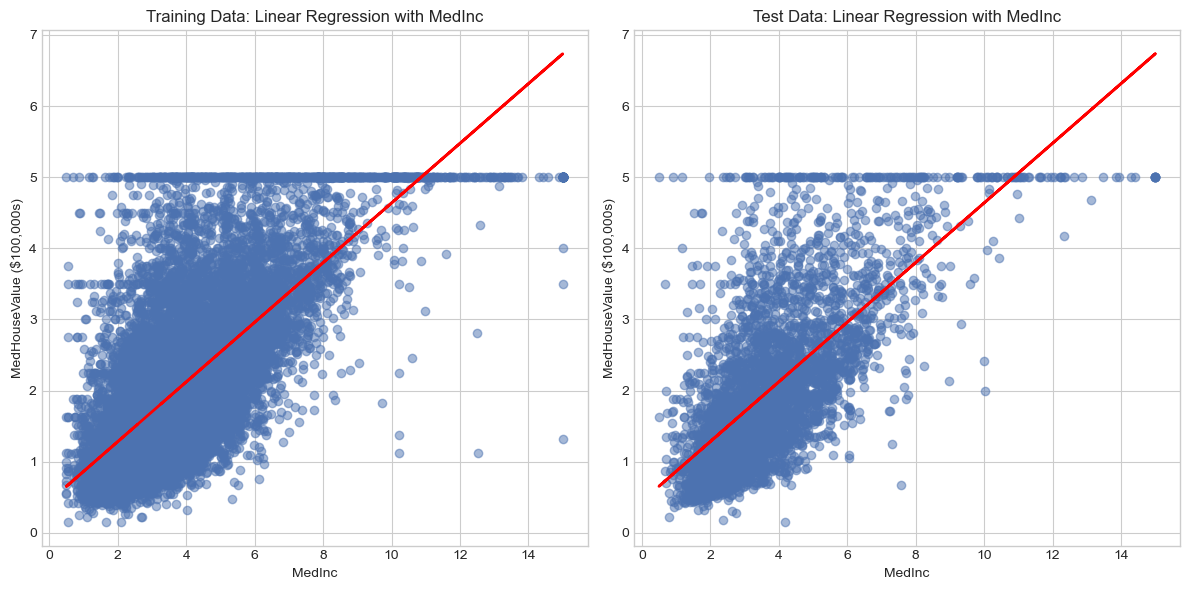

Simple Linear Regression Model:
Coefficient for MedInc: 0.4193
Intercept: 0.4446
Equation: MedHouseValue = 0.4446 + 0.4193 * MedInc


In [28]:
# Visualize the simple linear regression results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_simple, y_train, alpha=0.5)
plt.plot(X_train_simple, y_train_pred_simple, color='red', linewidth=2)
plt.title(f'Training Data: Linear Regression with {strongest_feature}')
plt.xlabel(strongest_feature)
plt.ylabel('MedHouseValue ($100,000s)')

plt.subplot(1, 2, 2)
plt.scatter(X_test_simple, y_test, alpha=0.5)
plt.plot(X_test_simple, y_test_pred_simple, color='red', linewidth=2)
plt.title(f'Test Data: Linear Regression with {strongest_feature}')
plt.xlabel(strongest_feature)
plt.ylabel('MedHouseValue ($100,000s)')

plt.tight_layout()
plt.show()

# INSTRUCTION:
# The red line represents our model's predictions.
# If the points follow the line closely, it indicates a good fit.
# Scattered points far from the line suggest the model isn't capturing all the variation.
# Note that in Linear Regression, MSE (Mean Squared Error) is used as the loss function
# during training. The model's coefficients are chosen to minimize this value.
# R² represents the proportion of variance explained by the model, with 1.0 being perfect.

# NEW CELL ————
# Print model coefficients
print(f"Simple Linear Regression Model:")
print(f"Coefficient for {strongest_feature}: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Equation: MedHouseValue = {simple_model.intercept_:.4f} + {simple_model.coef_[0]:.4f} * {strongest_feature}")

# INSTRUCTION:
# The coefficient tells you how much the median house value changes for each unit increase in the feature.
# A positive coefficient indicates a positive relationship, while a negative coefficient
# indicates a negative relationship.
# The intercept is the predicted value when the feature equals zero (though this may not always be meaningful).

# NEW CELL ————

In [29]:
# Now, let's select multiple features for a more complex model

# Option 1: Select features with correlation above a threshold
correlation_threshold = 0.4  # Adjust based on your correlation matrix
selected_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Option 2: Select top N features with highest correlation
n_top_features = 3  # Change as needed
top_features = correlations_with_target.abs().sort_values(ascending=False).index[:n_top_features].tolist()

# Choose which selection method to use
features_to_use = top_features  # Change to selected_features if you prefer that method
print(f"Selected features for multiple regression: {features_to_use}")

Selected features for multiple regression: ['MedInc', 'AveRooms', 'Latitude']


In [30]:
# Multiple Linear Regression with selected features
X_train_multi = X_train[features_to_use]
X_test_multi = X_test[features_to_use]

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

# Get predictions
y_train_pred_multi = multi_model.predict(X_train_multi)
y_test_pred_multi = multi_model.predict(X_test_multi)

In [31]:
# Evaluate the multiple regression model
# Calculate metrics
train_mse_multi = mean_squared_error(y_train, y_train_pred_multi)
train_rmse_multi = np.sqrt(train_mse_multi)
train_mae_multi = mean_absolute_error(y_train, y_train_pred_multi)
train_mape_multi = np.mean(np.abs((y_train - y_train_pred_multi) / y_train)) * 100
train_r2_multi = r2_score(y_train, y_train_pred_multi)

test_mse_multi = mean_squared_error(y_test, y_test_pred_multi)
test_rmse_multi = np.sqrt(test_mse_multi)
test_mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
test_mape_multi = np.mean(np.abs((y_test - y_test_pred_multi) / y_test)) * 100
test_r2_multi = r2_score(y_test, y_test_pred_multi)

# Print metrics
print(f"Multiple Linear Regression with {len(features_to_use)} features:")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_multi:.4f}")
print(f"RMSE: {train_rmse_multi:.4f}")
print(f"MAE: {train_mae_multi:.4f}")
print(f"MAPE: {train_mape_multi:.2f}%")
print(f"R²: {train_r2_multi:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_multi:.4f}")
print(f"RMSE: {test_rmse_multi:.4f}")
print(f"MAE: {test_mae_multi:.4f}")
print(f"MAPE: {test_mape_multi:.2f}%")
print(f"R²: {test_r2_multi:.4f}")

Multiple Linear Regression with 3 features:

Training Metrics:
MSE: 0.6825
RMSE: 0.8261
MAE: 0.6134
MAPE: 37.08%
R²: 0.4895

Testing Metrics:
MSE: 0.6942
RMSE: 0.8332
MAE: 0.6215
MAPE: 37.90%
R²: 0.4703


In [32]:
# Print model coefficients for the multiple regression
print("\nMultiple Linear Regression Model Coefficients:")
for feature, coef in zip(features_to_use, multi_model.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")
print(f"Intercept: {multi_model.intercept_:.4f}")


Multiple Linear Regression Model Coefficients:
Coefficient for MedInc: 0.4300
Coefficient for AveRooms: -0.0341
Coefficient for Latitude: -0.0438
Intercept: 2.1504


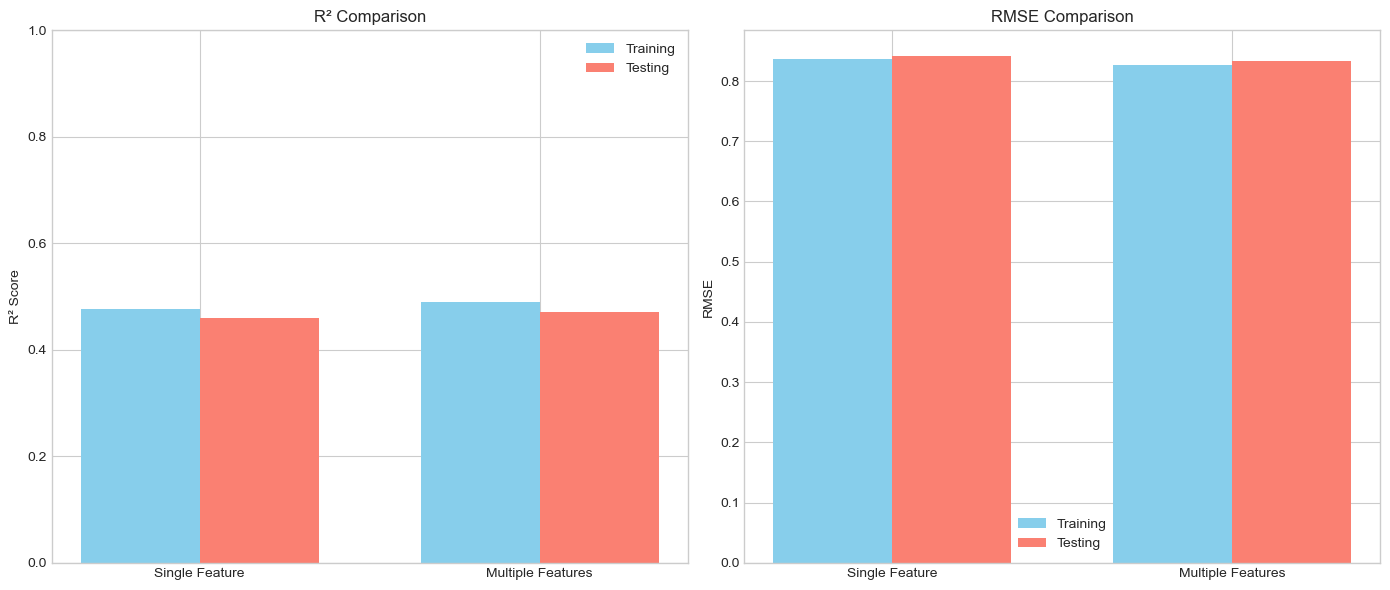

In [33]:
# Compare the performance of single feature vs. multiple feature models
models = ['Single Feature', 'Multiple Features']
train_r2 = [train_r2_simple, train_r2_multi]
test_r2 = [test_r2_simple, test_r2_multi]
train_rmse = [train_rmse_simple, train_rmse_multi]
test_rmse = [test_rmse_simple, test_rmse_multi]

# Plot R² comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
x = range(len(models))
width = 0.35
plt.bar([i - width/2 for i in x], train_r2, width, label='Training', color='skyblue')
plt.bar([i + width/2 for i in x], test_r2, width, label='Testing', color='salmon')
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

# Plot RMSE comparison
plt.subplot(1, 2, 2)
plt.bar([i - width/2 for i in x], train_rmse, width, label='Training', color='skyblue')
plt.bar([i + width/2 for i in x], test_rmse, width, label='Testing', color='salmon')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

# INSTRUCTION:
# Compare the performance of the single feature model versus the multiple feature model.
# A higher R² and lower RMSE indicate a better model.
# If the test metrics are much worse than the training metrics, the model might be overfitting.
# The multiple feature model should typically perform better than the single feature model,
# but adding more features doesn't always lead to significant improvements.
# Finding the right balance of features is key to building a good model.


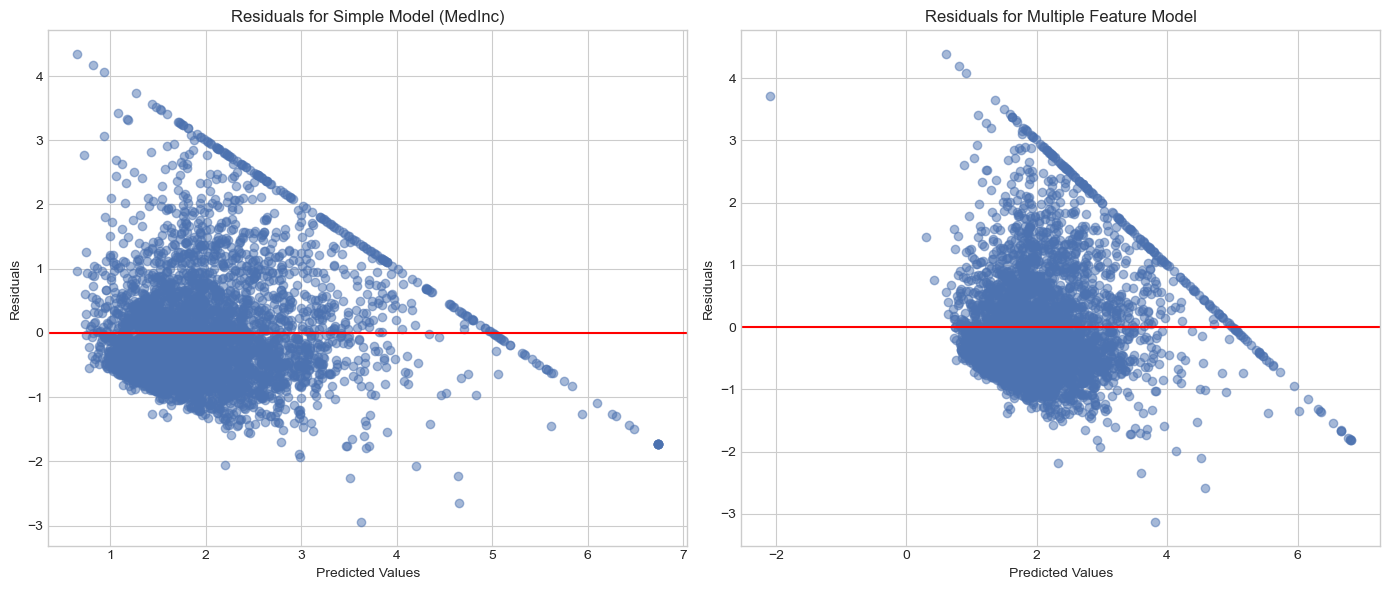

In [34]:
# Residual analysis to check model assumptions
plt.figure(figsize=(14, 6))

# Residuals for simple model
plt.subplot(1, 2, 1)
residuals_simple = y_test - y_test_pred_simple
plt.scatter(y_test_pred_simple, residuals_simple, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title(f'Residuals for Simple Model ({strongest_feature})')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals for multiple model
plt.subplot(1, 2, 2)
residuals_multi = y_test - y_test_pred_multi
plt.scatter(y_test_pred_multi, residuals_multi, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residuals for Multiple Feature Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# INSTRUCTION:
# Residual plots help us check if linear regression assumptions are met:
# 1. Residuals should be randomly scattered around zero (the red line)
# 2. There should be no obvious patterns in the residuals
# 3. The spread of residuals should be consistent across predicted values
#
# If you see patterns like curves, funnels (increasing/decreasing spread),
# or clusters, it suggests the model is violating one or more assumptions
# of linear regression and might need improvement.

# NEW CELL ————

In [35]:
# Full model using all features
X_train_full = X_train
X_test_full = X_test

full_model = LinearRegression()
full_model.fit(X_train_full, y_train)

# Get predictions
y_train_pred_full = full_model.predict(X_train_full)
y_test_pred_full = full_model.predict(X_test_full)

# Calculate all metrics for the full model
train_mse_full = mean_squared_error(y_train, y_train_pred_full)
train_rmse_full = np.sqrt(train_mse_full)
train_mae_full = mean_absolute_error(y_train, y_train_pred_full)
train_mape_full = np.mean(np.abs((y_train - y_train_pred_full) / y_train)) * 100
train_r2_full = r2_score(y_train, y_train_pred_full)

test_mse_full = mean_squared_error(y_test, y_test_pred_full)
test_rmse_full = np.sqrt(test_mse_full)
test_mae_full = mean_absolute_error(y_test, y_test_pred_full)
test_mape_full = np.mean(np.abs((y_test - y_test_pred_full) / y_test)) * 100
test_r2_full = r2_score(y_test, y_test_pred_full)

# Print all metrics
print("Full Model (All Features):")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_full:.4f}")
print(f"RMSE: {train_rmse_full:.4f}")
print(f"MAE: {train_mae_full:.4f}")
print(f"MAPE: {train_mape_full:.2f}%")
print(f"R²: {train_r2_full:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_full:.4f}")
print(f"RMSE: {test_rmse_full:.4f}")
print(f"MAE: {test_mae_full:.4f}")
print(f"MAPE: {test_mape_full:.2f}%")
print(f"R²: {test_r2_full:.4f}")

# INSTRUCTION:
# When evaluating a regression model, different metrics tell different stories:
#
# - MSE (Mean Squared Error): The loss function used by Linear Regression during training.
#   Heavily penalizes large errors due to squaring. Lower values are better.
#
# - RMSE (Root Mean Squared Error): Square root of MSE, expressed in the same units as the target.
#   Easier to interpret than MSE. Lower values indic

Full Model (All Features):

Training Metrics:
MSE: 0.5179
RMSE: 0.7197
MAE: 0.5286
MAPE: 31.50%
R²: 0.6126

Testing Metrics:
MSE: 0.5559
RMSE: 0.7456
MAE: 0.5332
MAPE: 31.95%
R²: 0.5758


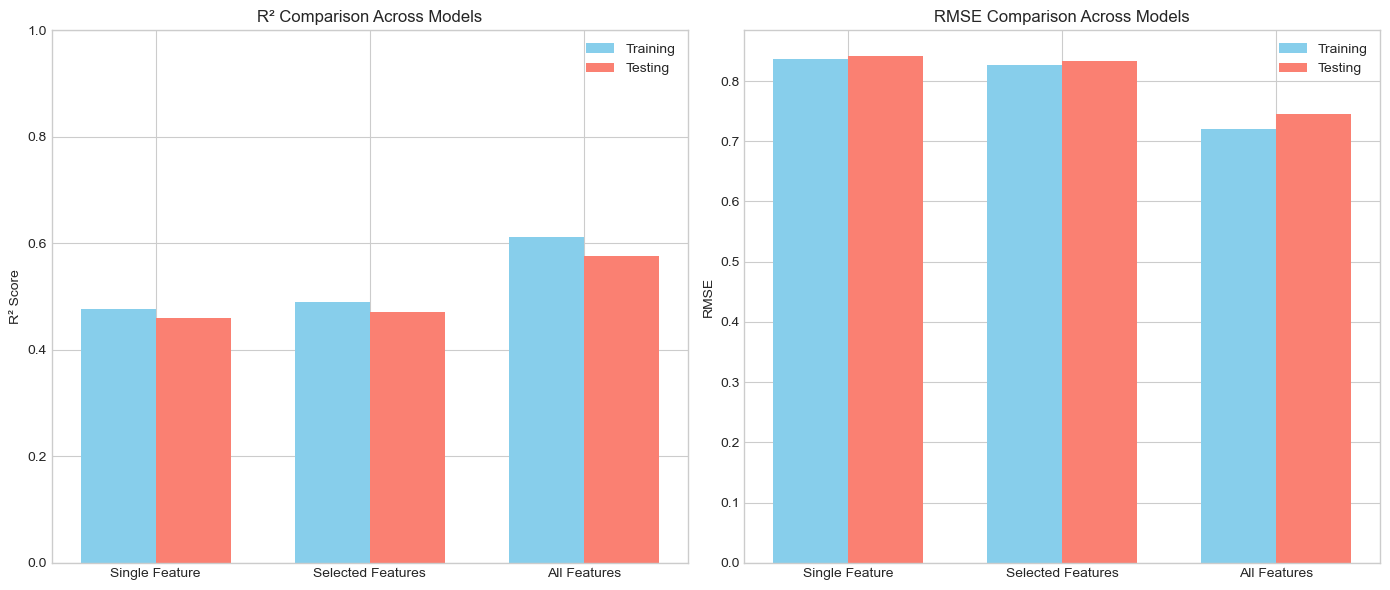

In [36]:
# Compare all models
models = ['Single Feature', 'Selected Features', 'All Features']
train_r2_values = [train_r2_simple, train_r2_multi, train_r2_full]
test_r2_values = [test_r2_simple, test_r2_multi, test_r2_full]
train_rmse_values = [train_rmse_simple, train_rmse_multi, train_rmse_full]
test_rmse_values = [test_rmse_simple, test_rmse_multi, test_rmse_full]

# Plot the comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
x = range(len(models))
width = 0.35
plt.bar([i - width/2 for i in x], train_r2_values, width, label='Training', color='skyblue')
plt.bar([i + width/2 for i in x], test_r2_values, width, label='Testing', color='salmon')
plt.ylabel('R² Score')
plt.title('R² Comparison Across Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar([i - width/2 for i in x], train_rmse_values, width, label='Training', color='skyblue')
plt.bar([i + width/2 for i in x], test_rmse_values, width, label='Testing', color='salmon')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Models')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

# INSTRUCTION:
# This final comparison lets you see how model performance changes as you add more features.
# Key observations to discuss with students:
# 1. Is there a significant improvement when moving from one feature to multiple features?
# 2. Does using all features provide substantial benefits over using just the top features?
# 3. Look for signs of overfitting (large gap between training and testing performance)
# 4. Discuss the principle of parsimony (prefer simpler models when performance is similar)
#
# Remember: Linear regression with sklearn uses Mean Squared Error (MSE) as its loss function
# during training. The model finds coefficients that minimize this value.

# NEW CELL ————

In [37]:
# Summary and conclusion
print("Linear Regression Model Comparison Summary")
print("-----------------------------------------")
print(f"Single feature model ({strongest_feature}):")
print(f"  Test R²: {test_r2_simple:.4f}, RMSE: {test_rmse_simple:.4f}")
print(f"\nMultiple feature model ({', '.join(features_to_use)}):")
print(f"  Test R²: {test_r2_multi:.4f}, RMSE: {test_rmse_multi:.4f}")
print(f"\nFull model (all {X.shape[1]} features):")
print(f"  Test R²: {test_r2_full:.4f}, RMSE: {test_rmse_full:.4f}")

# CONCLUSION:
# Key Takeaways for MBA Students:
# 1. Data exploration is critical before building any model
# 2. Feature selection matters - sometimes fewer features can produce nearly as good results
# 3. Always check model assumptions using residual plots
# 4. Compare models using appropriate metrics (R², RMSE, etc.)
# 5. Consider the trade-off between model complexity and performance
# 6. Remember that different metrics tell different stories about model performance

Linear Regression Model Comparison Summary
-----------------------------------------
Single feature model (MedInc):
  Test R²: 0.4589, RMSE: 0.8421

Multiple feature model (MedInc, AveRooms, Latitude):
  Test R²: 0.4703, RMSE: 0.8332

Full model (all 8 features):
  Test R²: 0.5758, RMSE: 0.7456
